# STEP 1 : IMPORTING ALL THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# STEP 2: IMPORTING THE DATASET

In [2]:
data=pd.read_excel('loan-predictionUC.csv (1) (1) (1) (3).xlsx') 
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# STEP 3:UNDERSTANDING THE DATA# STEP 3:UNDERSTANDING THE DATA

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.shape

(614, 13)

In [7]:
data.info() #gives information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
data.describe() #describes the statistical concepts for the data like mean , median , minimum, maximum, count ,etc

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
pd.crosstab(data['Credit_History'],data['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

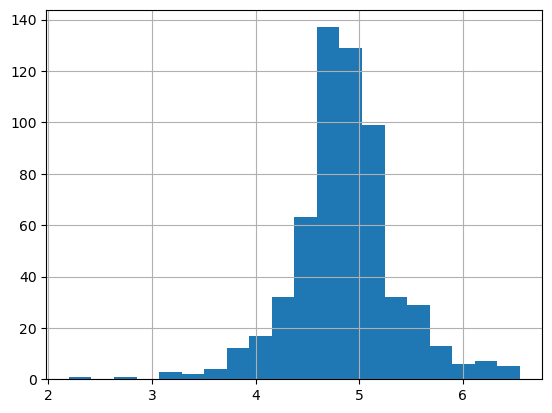

In [10]:
data["LoanAmount_Log"]= np.log(data['LoanAmount'])
data['LoanAmount_Log'].hist(bins=20)

# STEP 4 : FINDING MISSING VALUES AND DEALING WITH THEM IF ANY

In [11]:
missing_values=data.isnull()
missing_values  
#Checking for missing values: True = missing value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Log
0,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
total_missing_values=missing_values.sum()   #Count the number of missing values
columns_with_missing_values = missing_values.any()   #Identify the columns with missing values
print('Total missing values:', total_missing_values,)
print('Columns with missing values:', columns_with_missing_values)

Total missing values: Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_Log       22
dtype: int64
Columns with missing values: Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
LoanAmount_Log        True
dtype: bool


In [13]:
#Dealing with missing values in every column using mode
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].mean())
data.LoanAmount_Log=data.LoanAmount_Log.fillna(data.LoanAmount_Log.mean())
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [14]:
data.isnull().sum() #succesfully handled the missing values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_Log       0
dtype: int64

# STEP 5 : VISUALIZATIONS FOR THE DATA

C:\Users\Admin\AppData\Local\Temp\ipykernel_12352\3642542255.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


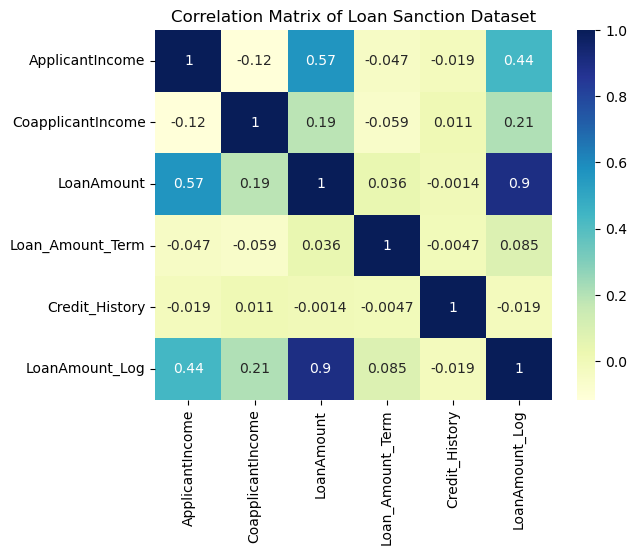

In [15]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix of Loan Sanction Dataset')
plt.show()
#Correlation is a mutual relationship or connection between two or more things

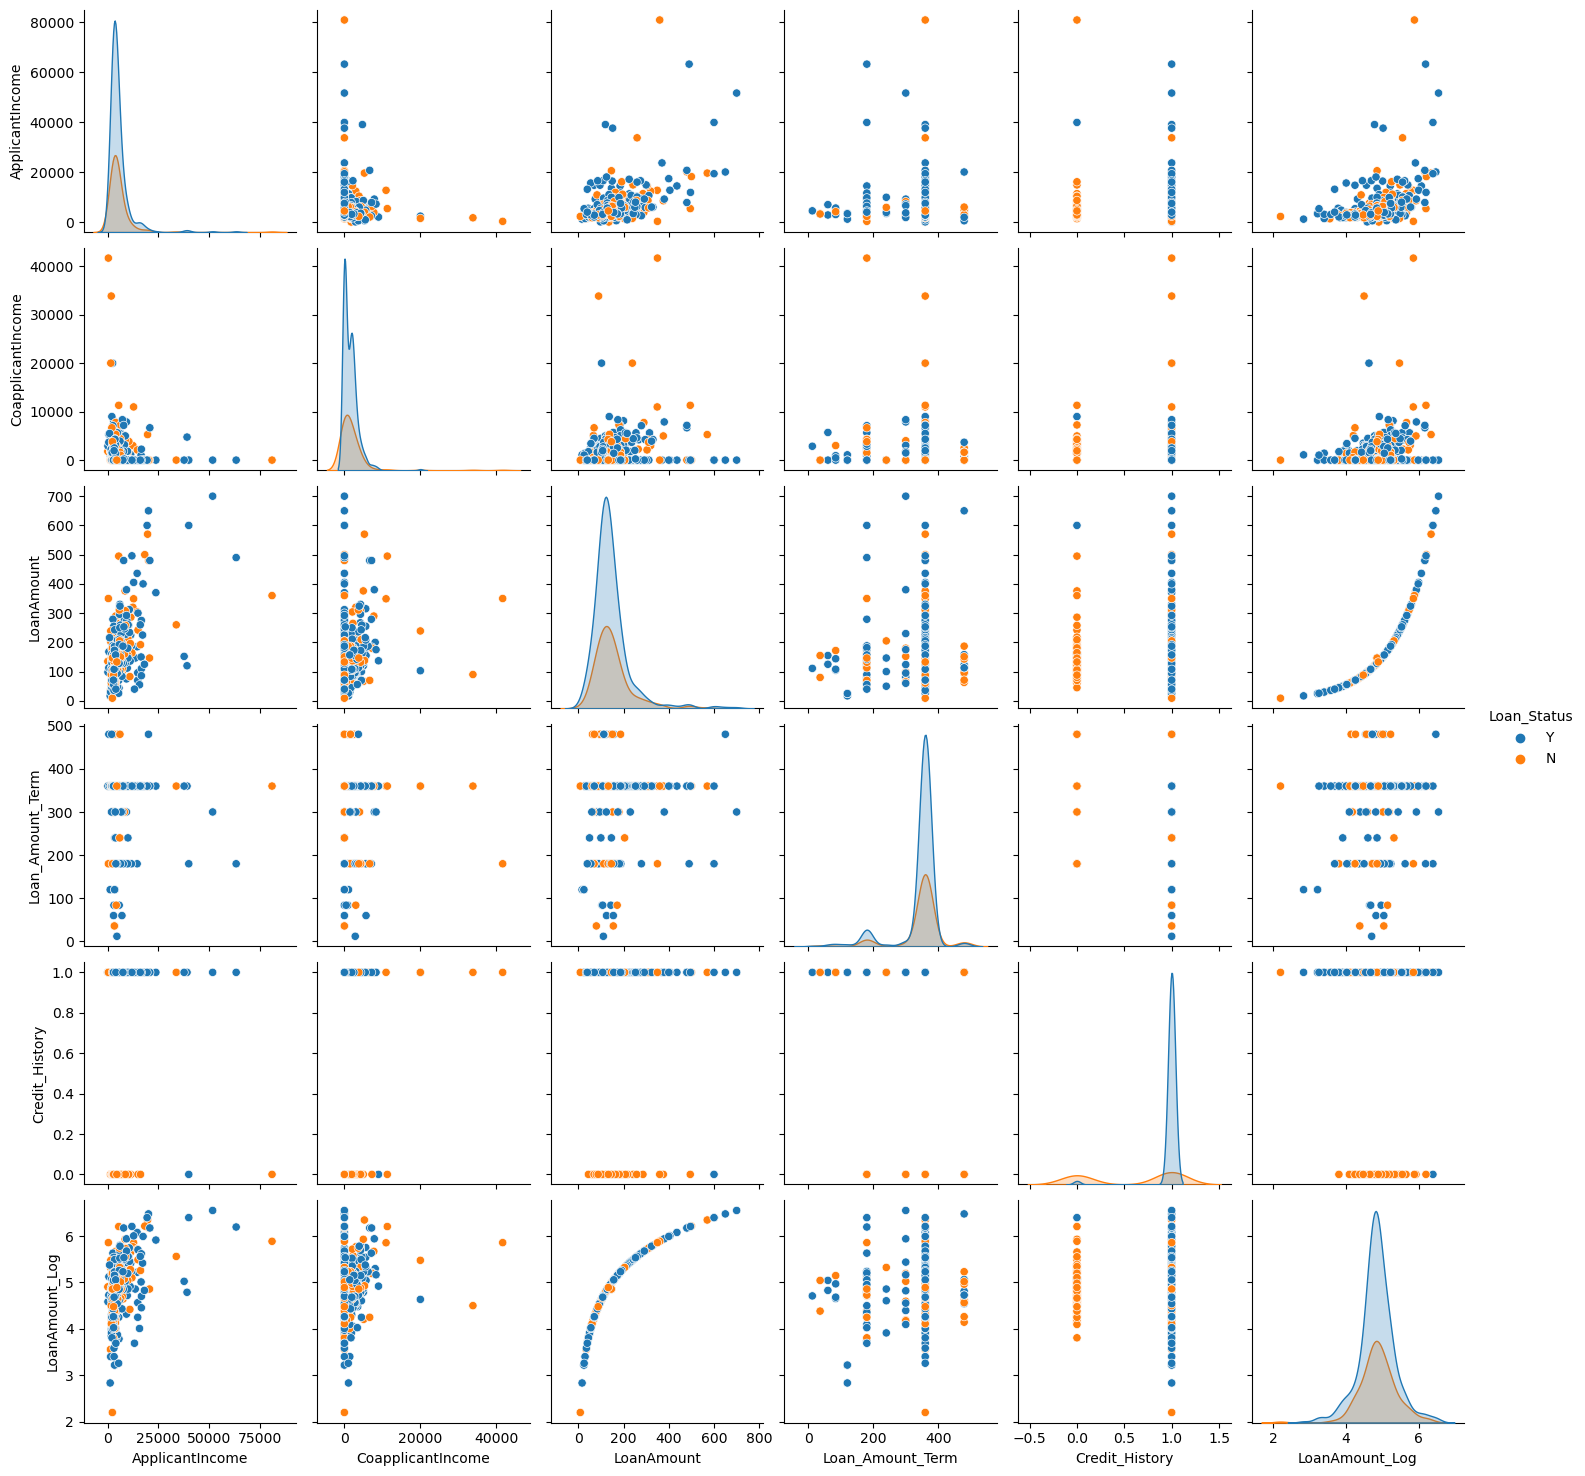

In [16]:
sns.pairplot(data, hue='Loan_Status')  #creating a pair plot showing relationships between all of the variables in the dataset.
plt.show()

Text(0.5, 1.0, 'Applicant Income')

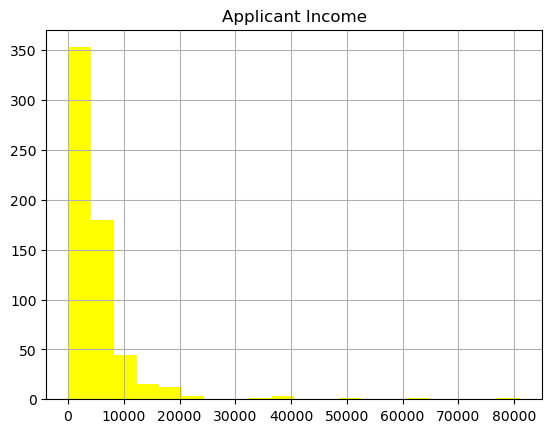

In [17]:
data['ApplicantIncome'].hist(bins=20,color='yellow')
plt.title('Applicant Income')

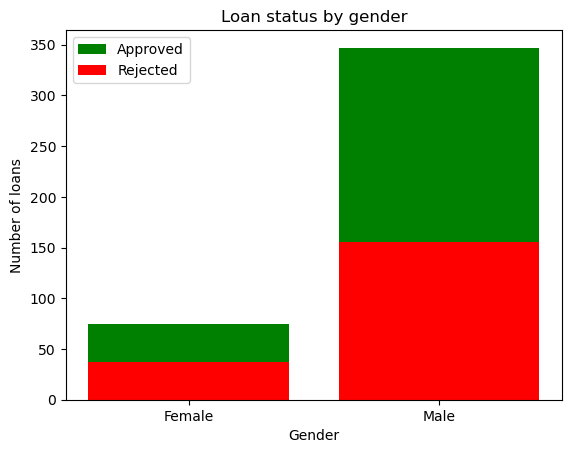

In [18]:
loan_status_by_gender = data.groupby('Gender')['Loan_Status'].value_counts()
loan_status_by_gender = loan_status_by_gender.unstack()
plt.bar(loan_status_by_gender.index, loan_status_by_gender['Y'], color='green', label='Approved')
plt.bar(loan_status_by_gender.index, loan_status_by_gender['N'], color='red', label='Rejected')
plt.xlabel('Gender')
plt.ylabel('Number of loans')
plt.title('Loan status by gender')
plt.legend()
plt.show()

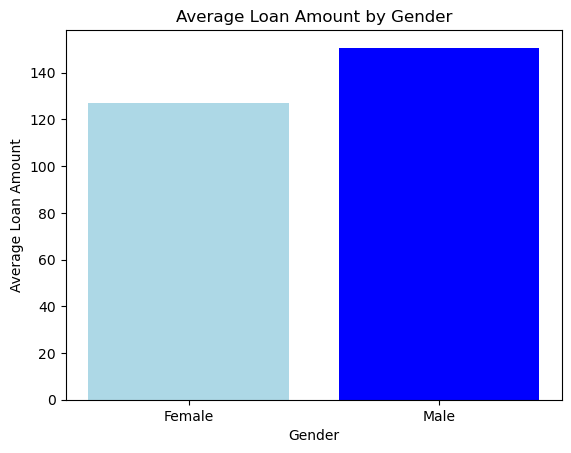

In [19]:
average_loan_amount_by_gender = data.groupby('Gender')['LoanAmount'].mean()

plt.bar(average_loan_amount_by_gender.index, average_loan_amount_by_gender,color=["lightblue", "blue"])
plt.xlabel('Gender')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Gender')
plt.show()

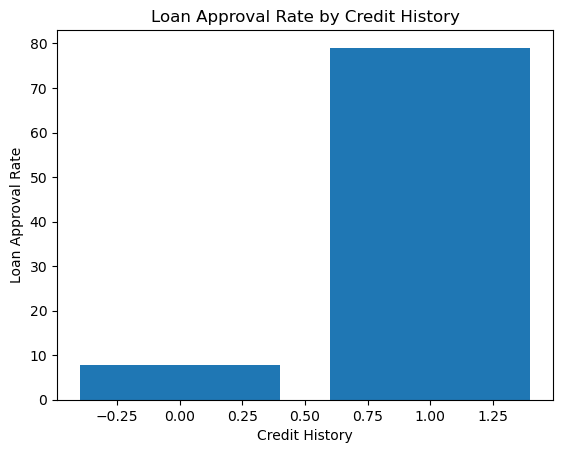

In [20]:
loan_approval_rate_by_credit_history = data[data['Loan_Status'] == 'Y'].groupby('Credit_History')['Loan_ID'].count() / data.groupby('Credit_History')['Loan_ID'].count() * 100

plt.bar(loan_approval_rate_by_credit_history.index, loan_approval_rate_by_credit_history)
plt.xlabel('Credit History')
plt.ylabel('Loan Approval Rate')
plt.title('Loan Approval Rate by Credit History')
plt.show()

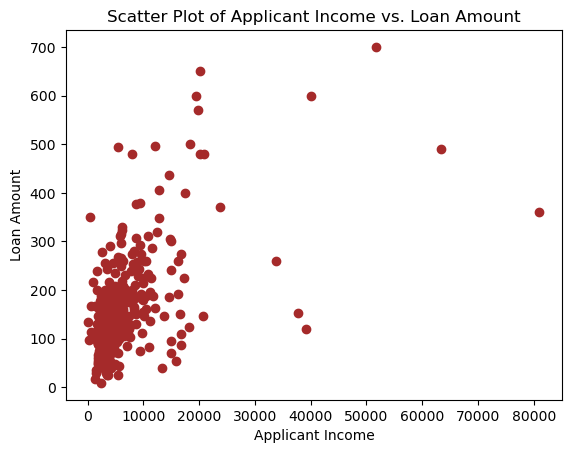

In [21]:
plt.scatter(data['ApplicantIncome'], data['LoanAmount'],color='#A52A2A')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot of Applicant Income vs. Loan Amount')
plt.show()


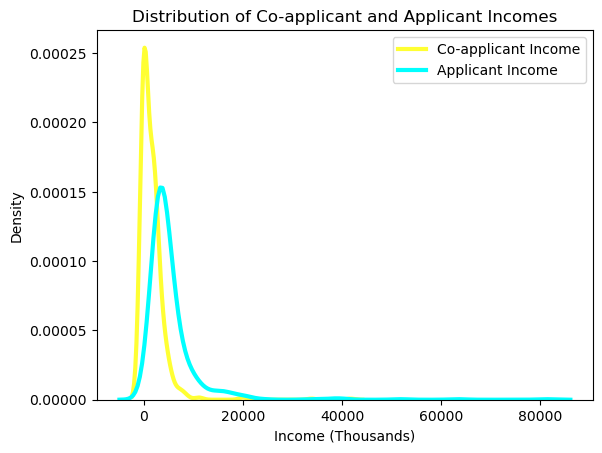

In [23]:
sns.kdeplot(data['CoapplicantIncome'], label='Co-applicant Income',color='#FFFF33',linewidth=3)
sns.kdeplot(data['ApplicantIncome'], label='Applicant Income',color='#00FFFF',linewidth=3)
plt.xlabel('Income (Thousands)')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of Co-applicant and Applicant Incomes')
plt.show()

# HANDLING CATAGORICAL COLUMNS

Changing catagorical data into binary for machine learning models

In [26]:
data.sample(3) #taking 3 sample rows from the data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Log
137,LP001491,Male,Yes,2,Graduate,Yes,3316,3500.0,88.0,360.0,1.0,Urban,Y,4.477337
461,LP002484,Male,Yes,3+,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban,Y,4.852030
536,LP002734,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,Y,5.780744


In [27]:
data['Dependents']=data['Dependents'].replace(to_replace = "3+",value=4)
data['Dependents'].unique()   #changed "3+" in the dependents column to "4"

array([0, 1, 2, 4], dtype=int64)

In [28]:
data['Property_Area'].unique()


array(['Urban', 'Rural', 'Semiurban', 'Semi-urban', 'semiurban'],
      dtype=object)

In [29]:
data = data.dropna(subset=['Property_Area'])

In [30]:
data['Property_Area']

0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object

In [31]:
data['Property_Area'] = data['Property_Area'].replace(r'Semiurban|Semi-urban|semiurban', 2, regex=True)
data['Property_Area'] = data['Property_Area'].replace(r'Rural', 0, regex=True)
data['Property_Area'] = data['Property_Area'].replace(r'Urban', 1, regex=True)
data['Property_Area']

0      1
1      0
2      1
3      1
4      1
      ..
609    0
610    0
611    1
612    1
613    2
Name: Property_Area, Length: 614, dtype: int64

In [32]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married']=data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0}).astype('int') 

In [33]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Log
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1,4.857444
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1,4.189655
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1,4.787492
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1,4.948760


In [34]:
data['Loan_ID_Numeric'] = data['Loan_ID'].astype('category').cat.codes
data.drop('Loan_ID', inplace=True, axis=1)
print(data)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           4          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

# STEP 6 : DIVIDING THE DATASET INTO TRAINING AND TEST DATASETS

In [35]:
X= data.drop('Loan_Status',axis=1) #independent variable
y= data['Loan_Status']  #target variable
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 13)
(123, 13)
(491,)
(123,)


# STEP 7 :BUILDING MACHINE LEARNING MODEL SUITABLE FOR THE DATASET

#LOGISTIC REGRESSION

In [40]:
from sklearn.linear_model import LogisticRegression  # Using Logistic Regression algorithm
model = LogisticRegression(max_iter=1000)


# STEP 8 :FITTING THE MODEL ON THE TRAINING DATASET

In [41]:
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [42]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#PREDICTION

In [43]:
y_pred = model.predict(X_test)

In [47]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# STEP 9 : TESTING THE MODEL AND FINDING THE ACCURACY

#MODEL EVALUATION

In [48]:
model.score(X_train,y_train)

0.8187372708757638

In [49]:
model.score(X_test,y_test)

0.7886178861788617

#CHECKING THE ACCURACY OF THE MODEL ON TEST AND TRAINING DATSETS

In [50]:
accuracy_test = model.score(X_test, y_test)         #Checking the accuracy of the test dataset

print('Accuracy on the test set:', accuracy_test)


Accuracy on the test set: 0.7886178861788617


An accuracy of 0.7886178861788617 on the test sets indicates that the model is able to correctly predict the target variable for about 79% of the data points in the test set.

In [51]:
accuracy_train = model.score(X_train , y_train)
print("Accuracy on the training set: ", accuracy_train)

Accuracy on the training set:  0.8187372708757638


An accuracy of 0.8187372708757638 on the training set means that the logistic regression model is able to correctly predict the target variable for about 82% of the data points in the training set.

# STEP 10 : CREATING A CONFUSION MATRIX

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[18, 25],
       [ 1, 79]], dtype=int64)

In [58]:
from sklearn import metrics

Using the confusion matrix(cm) to calculate other metrics, such as precision, recall, and F1 score.

In [59]:
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])      #precision
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])       #recall
f1_score = 2 * (precision * recall) / (precision + recall)    #F1 score

# Print the metrics
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

Precision: 0.7596153846153846
Recall: 0.9875
F1 score: 0.8586956521739131


A precision of 0.7596153846153846 means that 75.96% of the data points that the model predicted to be positive were actually positive.
A recall of 0.9875 means that the model was able to identify 98.75% of the positive data points in the test set. 
An F1 score of 0.8586956521739131 means that the model is performing well overall, as it takes into account both the precision and recall of the model.

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

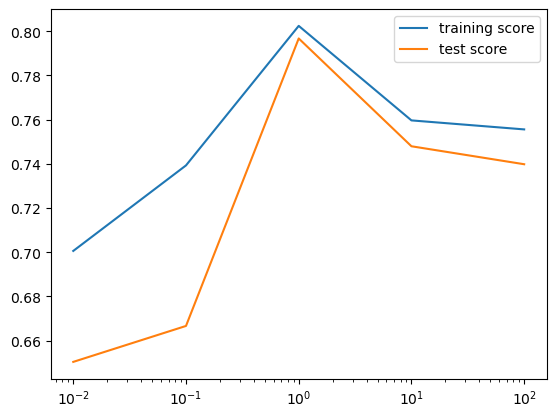

In [60]:
c = [0.01,0.1,1,10,100]
test_score=[]
train_score=[]
for i in c:
    clf = LogisticRegression(C=i)
    clf.fit(X_train,y_train)
    train_score.append(clf.score(X_train,y_train))
    test_score.append(clf.score(X_test,y_test))
    
plt.plot(c, train_score, label="training score")
plt.plot(c, test_score, label="test score")
plt.xscale('log')
plt.legend()

# Project by - Purnima Monga